# Toy gaussian example auto example

/Users/derek/Desktop/intro_to_gaussian_splatting/splat/custom_pytorch_implementation/auto_functions.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return final_color, torch.tensor(current_T)


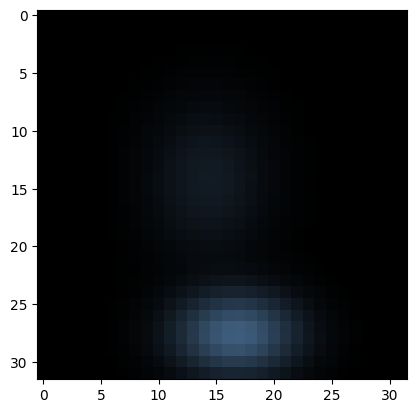

 33%|███▎      | 1/3 [00:08<00:16,  8.49s/it, loss=0.0162]

loss tensor(0.0162, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[5.2410e+00, 4.3482e-01, 2.5947e-03]], dtype=torch.float64)
R grad1 tensor([[ 9.2230e-05, -1.0784e-03, -8.1546e-04, -8.3509e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0171, 0.0226, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0022, 0.0036, 0.0051], dtype=torch.float64)
Opacity grad1 tensor([0.0027], dtype=torch.float64)
point_3d grad2 tensor([[-1.3434e+00, -2.2094e+00, -1.3423e-03]], dtype=torch.float64)
R grad2 tensor([[-0.0037,  0.0136,  0.0064,  0.0006]], dtype=torch.float64)
S grad2 tensor([[-0.0117, -0.0220,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0121, -0.0111, -0.0102], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)





 67%|██████▋   | 2/3 [00:17<00:08,  8.58s/it, loss=0.0158]

loss tensor(0.0158, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[6.8149e+00, 2.5045e-01, 2.8054e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.5174e-05, -1.0237e-03, -7.3119e-04, -8.0614e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0153, 0.0214, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0020, 0.0035, 0.0050], dtype=torch.float64)
Opacity grad1 tensor([0.0026], dtype=torch.float64)
point_3d grad2 tensor([[-0.0916, -1.0974, -0.0014]], dtype=torch.float64)
R grad2 tensor([[-0.0036,  0.0136,  0.0058,  0.0005]], dtype=torch.float64)
S grad2 tensor([[-0.0107, -0.0220,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0123, -0.0113, -0.0104], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)





100%|██████████| 3/3 [00:25<00:00,  8.55s/it, loss=0.0154]

loss tensor(0.0154, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[8.1327e+00, 1.5025e-02, 2.8813e-03]], dtype=torch.float64)
R grad1 tensor([[ 7.3987e-05, -9.5144e-04, -5.9073e-04, -7.3889e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0123, 0.0198, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0018, 0.0033, 0.0048], dtype=torch.float64)
Opacity grad1 tensor([0.0025], dtype=torch.float64)
point_3d grad2 tensor([[ 0.9532, -0.0766, -0.0013]], dtype=torch.float64)
R grad2 tensor([[-0.0035,  0.0134,  0.0052,  0.0005]], dtype=torch.float64)
S grad2 tensor([[-0.0097, -0.0217,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0123, -0.0112, -0.0102], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)



GT image
GT image


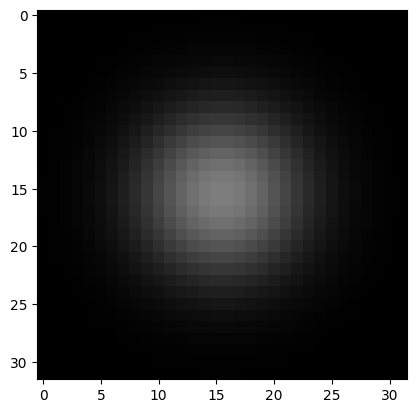

Final image


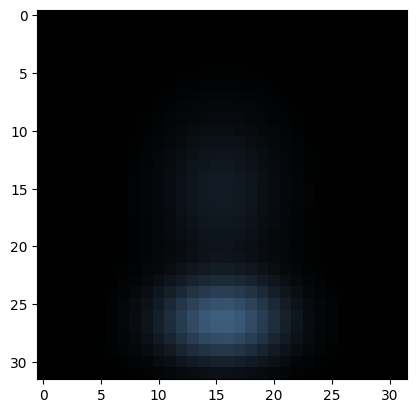

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.custom_pytorch_implementation.create_image_auto import (
    Camera,
    Gaussian,
    create_image_covariance_test_auto,
    create_image_full_auto,
    create_image_full_auto_multiple_gaussians,
)

torch.autograd.set_detect_anomaly(True)

point_3d1 = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
r1 = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s1 = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color1 = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity1 = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)
gaussian1 = Gaussian(
    mean_3d=point_3d1, 
    r=r1, 
    s=s1, 
    color=color1, 
    opacity=opacity1
)

point_3d2 = torch.tensor([[0.0999, 0.0999, -4.1]], dtype=torch.float64).requires_grad_(True)
r2 = torch.tensor([[0.2, 0.04, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s2 = torch.tensor([[.2, .16, .1]], dtype=torch.float64).requires_grad_(True)
color2 = torch.tensor([0.1, 0.15, 0.2], dtype=torch.float64).requires_grad_(True)
opacity2 = torch.tensor([0.9], dtype=torch.float64).requires_grad_(True)
gaussian2 = Gaussian(
    mean_3d=point_3d2, 
    r=r2, 
    s=s2, 
    color=color2, 
    opacity=opacity2
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_auto = create_image_full_auto_multiple_gaussians(camera, [gaussian1, gaussian2], height, width)
plt.imshow(output_auto.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r1, s1, point_3d1, color1, opacity1, r2, s2, point_3d2, color2, opacity2], lr=0.00005)

pbar = tqdm.tqdm(range(3))
for i in pbar:
    optimizer.zero_grad()

    output_auto = create_image_full_auto_multiple_gaussians(camera, [gaussian1, gaussian2], height, width)

    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward(retain_graph=True)
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("point_3d grad1", point_3d1.grad)
    print("R grad1", r1.grad)
    print("S grad1", s1.grad)
    print("Color grad1", color1.grad)
    print("Opacity grad1", opacity1.grad)
    print("point_3d grad2", point_3d2.grad)
    print("R grad2", r2.grad)
    print("S grad2", s2.grad)
    print("Color grad2", color2.grad)
    print("Opacity grad2", opacity2.grad)
    print("\n\n")

    
print("GT image")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

# Toy Gaussian Custom Example

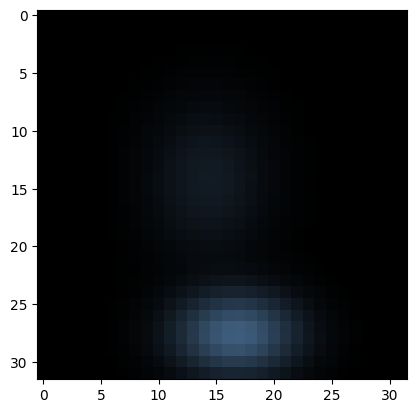

 33%|███▎      | 1/3 [00:03<00:06,  3.07s/it, loss=0.0162]

loss tensor(0.0162, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[5.2410e+00, 4.3482e-01, 2.5947e-03]], dtype=torch.float64)
R grad1 tensor([[ 9.2230e-05, -1.0784e-03, -8.1546e-04, -8.3509e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0171, 0.0226, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0022, 0.0036, 0.0051], dtype=torch.float64)
Opacity grad1 tensor([0.0027], dtype=torch.float64)
point_3d grad2 tensor([[-1.3434e+00, -2.2094e+00, -1.3423e-03]], dtype=torch.float64)
R grad2 tensor([[-0.0037,  0.0136,  0.0064,  0.0006]], dtype=torch.float64)
S grad2 tensor([[-0.0117, -0.0220,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0121, -0.0111, -0.0102], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)





 67%|██████▋   | 2/3 [00:05<00:02,  2.98s/it, loss=0.0158]

loss tensor(0.0158, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[6.8149e+00, 2.5045e-01, 2.8054e-03]], dtype=torch.float64)
R grad1 tensor([[ 8.5174e-05, -1.0237e-03, -7.3119e-04, -8.0614e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0153, 0.0214, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0020, 0.0035, 0.0050], dtype=torch.float64)
Opacity grad1 tensor([0.0026], dtype=torch.float64)
point_3d grad2 tensor([[-0.0916, -1.0974, -0.0014]], dtype=torch.float64)
R grad2 tensor([[-0.0036,  0.0136,  0.0058,  0.0005]], dtype=torch.float64)
S grad2 tensor([[-0.0107, -0.0220,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0123, -0.0113, -0.0104], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)





100%|██████████| 3/3 [00:09<00:00,  3.04s/it, loss=0.0154]

loss tensor(0.0154, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d grad1 tensor([[8.1327e+00, 1.5025e-02, 2.8813e-03]], dtype=torch.float64)
R grad1 tensor([[ 7.3987e-05, -9.5144e-04, -5.9073e-04, -7.3889e-05]],
       dtype=torch.float64)
S grad1 tensor([[0.0123, 0.0198, 0.0000]], dtype=torch.float64)
Color grad1 tensor([0.0018, 0.0033, 0.0048], dtype=torch.float64)
Opacity grad1 tensor([0.0025], dtype=torch.float64)
point_3d grad2 tensor([[ 0.9532, -0.0766, -0.0013]], dtype=torch.float64)
R grad2 tensor([[-0.0035,  0.0134,  0.0052,  0.0005]], dtype=torch.float64)
S grad2 tensor([[-0.0097, -0.0217,  0.0000]], dtype=torch.float64)
Color grad2 tensor([-0.0123, -0.0112, -0.0102], dtype=torch.float64)
Opacity grad2 tensor([-0.0014], dtype=torch.float64)



GT image
GT image


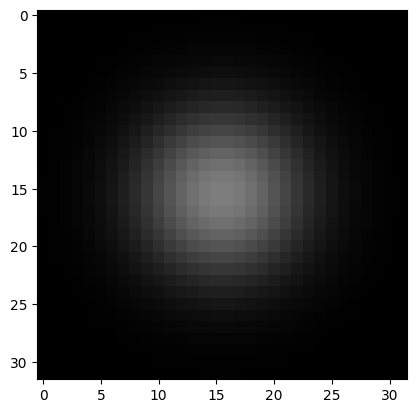

Final image


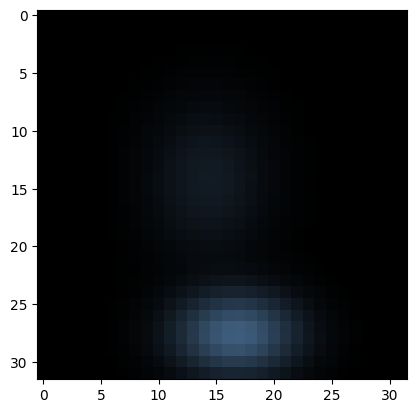

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.custom_pytorch_implementation.create_image_custom import (
    Camera,
    Gaussian,
    create_image_covariance_test_custom,
    create_image_full_custom,
    create_image_full_custom_multiple_gaussians,
)

torch.autograd.set_detect_anomaly(True)

point_3d1 = torch.tensor([[0.101, 0.1001, -4]], dtype=torch.float64).requires_grad_(True)
r1 = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s1 = torch.tensor([[.1, .15, .2]], dtype=torch.float64).requires_grad_(True)
color1 = torch.tensor([0.4, 0.6, 0.8], dtype=torch.float64).requires_grad_(True)
opacity1 = torch.tensor([0.5], dtype=torch.float64).requires_grad_(True)
gaussian1 = Gaussian(
    mean_3d=point_3d1, 
    r=r1, 
    s=s1, 
    color=color1, 
    opacity=opacity1
)

point_3d2 = torch.tensor([[0.0999, 0.0999, -4.1]], dtype=torch.float64).requires_grad_(True)
r2 = torch.tensor([[0.2, 0.04, 0.03, 0.001]], dtype=torch.float64).requires_grad_(True)
s2 = torch.tensor([[.2, .16, .1]], dtype=torch.float64).requires_grad_(True)
color2 = torch.tensor([0.1, 0.15, 0.2], dtype=torch.float64).requires_grad_(True)
opacity2 = torch.tensor([0.9], dtype=torch.float64).requires_grad_(True)
gaussian2 = Gaussian(
    mean_3d=point_3d2, 
    r=r2, 
    s=s2, 
    color=color2, 
    opacity=opacity2
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

# current_Ts = torch.ones((height, width))
# output_auto = create_image_full_custom(camera, gaussian1, height, width, current_Ts=current_Ts)
# current_Ts = torch.ones((height, width))
# second_output = create_image_full_custom(camera, gaussian2, height, width, current_Ts=current_Ts)
# final_image = output_auto + second_output
# plt.imshow(final_image.detach().numpy())
# plt.show()

output_custom = create_image_full_custom_multiple_gaussians(camera, [gaussian1, gaussian2], height, width)
plt.imshow(output_custom.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r1, s1, point_3d1, color1, opacity1, r2, s2, point_3d2, color2, opacity2], lr=0.00005)

pbar = tqdm.tqdm(range(3))
for i in pbar:
    optimizer.zero_grad()
    # we are sending gaussian1 through first since its z is closer to camera
    output_custom = create_image_full_custom_multiple_gaussians(camera, [gaussian1, gaussian2], height, width)
    loss = (output_custom - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("point_3d grad1", point_3d1.grad)
    print("R grad1", r1.grad)
    print("S grad1", s1.grad)
    print("Color grad1", color1.grad)
    print("Opacity grad1", opacity1.grad)
    print("point_3d grad2", point_3d2.grad)
    print("R grad2", r2.grad)
    print("S grad2", s2.grad)
    print("Color grad2", color2.grad)
    print("Opacity grad2", opacity2.grad)
    print("\n\n")

    
print("GT image")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()